In [611]:
import pandas as pd
import numpy as np
import gensim
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [612]:
train=pd.read_csv('train_file.csv')

In [613]:
train.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [614]:
for i in train.columns:
    print(i,train[i].nunique())

IDLink 55932
Title 48963
Headline 52112
Source 4753
Topic 4
PublishDate 49602
Facebook 2166
GooglePlus 273
LinkedIn 648
SentimentTitle 10014
SentimentHeadline 27265


In [615]:
train.describe()
train.isnull().sum()

IDLink                 0
Title                  0
Headline               0
Source               175
Topic                  0
PublishDate            0
Facebook               0
GooglePlus             0
LinkedIn               0
SentimentTitle         0
SentimentHeadline      0
dtype: int64

PreProcessing of Attribute Title

In [616]:
# list ofString in Title
titles_list = [title for title in train['Title']]

# Collapse the list of strings into a single long string for processing
big_title_string = ' '.join(titles_list)

from nltk.tokenize import word_tokenize

# converting string into words
tokens = word_tokenize(big_title_string)

# Remove non-alphabetic tokens, such as punctuation
words = [word.lower() for word in tokens if word.isalpha()]

# Filter out stopwords, exampe At, for, in , is for getting relevant words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

words = [word for word in words if not word in stop_words]

# Print first 10 words
words[:10]

['obama',
 'lays',
 'wreath',
 'arlington',
 'national',
 'cemetery',
 'look',
 'health',
 'chinese',
 'economy']

In [10]:
# Load Word2Vec model (trained on an enormous Google corpus)
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin_2.gz', binary = True) 

# Check dimension of word vectors
model.vector_size

C:\Users\Adarsh\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


300

In [617]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in words if word in model.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a dataframe
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.shape

(17854, 300)

In [618]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
obama,-0.123535,0.072266,0.171875,0.402344,-0.125977,-0.302734,-0.044922,-0.015259,0.171875,-0.043457,...,-0.055420,-0.138672,-0.064453,-0.104004,-0.267578,-0.205078,-0.111816,-0.022461,0.066895,0.026855
lays,-0.052246,-0.057373,0.193359,-0.106934,0.298828,-0.166016,0.137695,0.125000,-0.032227,-0.096191,...,-0.172852,-0.484375,-0.228516,0.168945,-0.291016,0.003647,0.041016,0.229492,0.248047,0.353516
wreath,0.166992,0.199219,-0.082031,0.142578,0.055420,-0.102539,0.103516,-0.138672,0.030884,-0.007050,...,0.015503,-0.085938,-0.173828,0.109863,0.096680,-0.102051,0.119629,-0.287109,-0.085938,0.188477
arlington,-0.006653,0.023926,0.141602,0.160156,0.052490,0.113281,-0.125000,-0.138672,-0.136719,0.023071,...,0.130859,0.104004,0.064453,0.068848,-0.069336,-0.137695,-0.000572,-0.125977,-0.086914,0.112793
national,-0.135742,0.175781,0.117188,0.078613,0.052490,-0.238281,0.092773,-0.083984,0.061523,-0.062500,...,0.034180,-0.039551,0.034424,-0.075195,0.006775,-0.110840,0.069336,-0.068359,0.032471,-0.009338


Reducing the Dimensinality #PCA or #TSNE

In [619]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])

In [620]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model.vocab]
    return np.mean(model[doc], axis=0)

# Our earlier preprocessing was done when we were dealing only with word vectors
# Here, we need each document to remain a document
def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stop_words]
    doc = [word for word in doc if word.isalpha()] 
    return doc

# Function that will help us drop documents that have no word vectors in word2vec
def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    return not all(word not in word2vec_model.vocab for word in doc)

# Filter out documents
def filter_docs(corpus, texts, condition_on_doc):
    """
    Filter corpus and texts given the function condition_on_doc which takes
    a doc. The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts)

In [621]:
# Preprocess the corpus
corpus = [preprocess(title) for title in titles_list]

# Remove docs that don't include any words in W2V's vocab
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: has_vector_representation(model, doc))

# Filter out any empty docs
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: (len(doc) != 0))

27 docs removed
0 docs removed


In [622]:
# Initialize an array for the size of the corpus
x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(model, doc))
    
X = np.array(x) # list to array

In [623]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(X[:400])

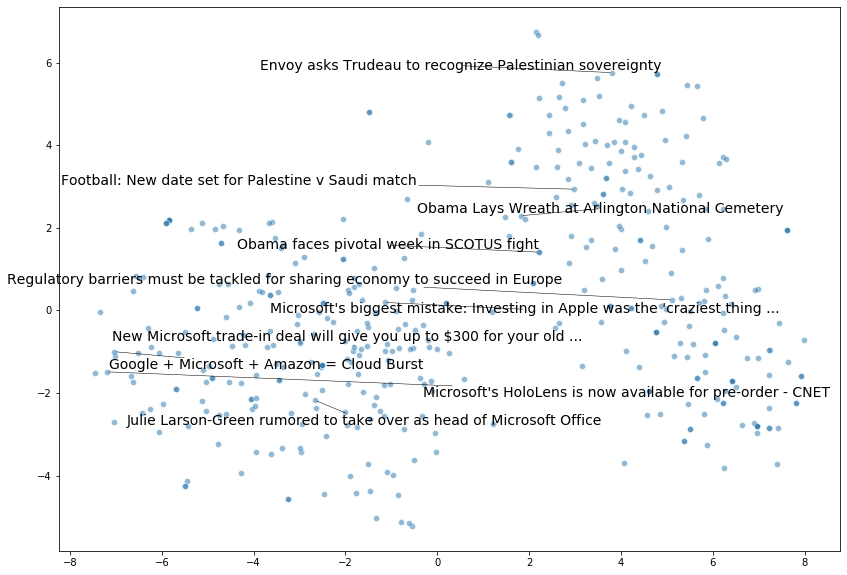

In [624]:
import seaborn as sns
from adjustText import adjust_text
fig, ax = plt.subplots(figsize = (14, 10))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Second plot: Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
titles_to_plot = list(np.arange(0, 400, 40)) # plots every 40th title in first 400 titles

# Append words to list
for title in titles_to_plot:
    texts.append(plt.text(tsne_df[title, 0], tsne_df[title, 1], titles_list[title], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [625]:
# Drop all the rows where the article popularities are unknown (this is only about 11% of the data)
train = train.drop(train[(train.Facebook == -1) | 
                                     (train.GooglePlus == -1) | 
                                     (train.LinkedIn == -1)].index)

# Also drop all rows where we don't know the source
train = train.drop(train[train['Source'].isna()].index)

train.shape

(51819, 11)

In [626]:
import datetime

# Convert publish date column to make it compatible with other datetime objects

train['PublishDate'] = pd.to_datetime(train['PublishDate'])

# Time since Linux Epoch
t = datetime.datetime(1970, 1, 1)

# Subtract this time from each article's publish date
train['TimeSinceEpoch'] = train['PublishDate'] - t

# Create another column for just the days from the timedelta objects 
train['DaysSinceEpoch'] = train['TimeSinceEpoch'].astype('timedelta64[D]')

train['TimeSinceEpoch'].describe()

count                         51819
mean     16818 days 20:37:23.103108
std         39 days 12:50:59.671166
min             16747 days 05:25:00
25%      16784 days 11:12:46.500000
50%             16819 days 05:21:03
75%      16852 days 22:33:05.500000
max             16889 days 01:41:08
Name: TimeSinceEpoch, dtype: object

In [627]:
# Get the list of top 12 sources by number of articles
source_names = list(train['Source'].value_counts()[:12].index)
# Group by Source, then get descriptive statistics for title sentiment
source_info = train.groupby('Source')['SentimentTitle'].describe()
# Recall that `source_names` contains the top 12 sources # We'll also sort by highest Standard deviation
source_info.loc[source_names].sort_values('std', ascending=False)[['std', 'min', 'max']]

,std,min,max
Source,,,
Huffington Post,0.159768,-0.541667,0.711512
Washington Post,0.149456,-0.530340,0.504280
Reuters,0.149185,-0.585573,0.676516
New York Times,0.147409,-0.513870,0.662913
Business Insider,0.146697,-0.557338,0.573742
CNN,0.144589,-0.632456,0.507941
ABC News,0.144102,-0.424931,0.795495
Forbes,0.141839,-0.618718,0.399380
Bloomberg,0.140366,-0.571181,0.612372


In [628]:
train['Source'].nunique()

4607

In [629]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=15, random_state=10) 
# as a reminder, x is the array with our 300-dimensional vectors
reduced_vecs = pca.fit_transform(x) 
df_w_vectors = pd.DataFrame(reduced_vecs) 
df_w_vectors [ 'Title'] = titles_list 
# Use pd.concat to match original titles with their vectors
main_w_vectors = pd.concat ((df_w_vectors, train), axis = 1)
# Get rid of vectors that could not be matched with the main_df
main_w_vectors .dropna(axis=0, inplace=True)

In [630]:
# Drop all non-numeric, non-dummy columns, for feeding into the models
cols_to_drop = ['Title', 'TimeSinceEpoch', 'Headline', 'PublishDate', 'Source'] 
le = LabelEncoder()
data_only_df=pd.DataFrame()
data_only_df = main_w_vectors.drop(columns = cols_to_drop) 
data_only_df['Topic'] = le.fit_transform(main_w_vectors['Topic'].astype(str))
# Standardize DaysSinceEpoch since the raw numbers are larger in magnitude
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler () 
# Reshape so we can feed the column to the scaler 
Standardized_days = np.array(data_only_df['DaysSinceEpoch']).reshape(-1, 1) 
data_only_df['StandardizedDays']=0.0
data_only_df['StandardizedDays'] = scaler.fit_transform(Standardized_days) 
# Drop the raw column; we don't need it anymore 
data_only_df.drop (columns=['DaysSinceEpoch'], inplace=True)
# Look at the new range 
data_only_df['StandardizedDays'].describe()

C:\Users\Adarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Adarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Adarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

count    5.179200e+04
mean     2.493595e-14
std      1.000010e+00
min     -1.804643e+00
25%     -8.680766e-01
50%      1.786476e-02
75%      8.531809e-01
max      1.789748e+00
Name: StandardizedDays, dtype: float64

In [632]:
data_only_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,IDLink,Topic,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline,StandardizedDays
726,0.609562,-0.388919,-0.134100,0.003282,0.087180,0.146272,0.125071,-0.188949,0.009642,-0.058916,...,-0.011065,0.013072,KQrodyIVM6,1,0.0,0.0,0.0,0.000000,-0.132812,-1.804643
727,-0.544063,-0.391277,-0.190245,-0.235133,0.079264,-0.027043,0.120542,-0.091049,-0.038410,0.018562,...,-0.084727,-0.140685,HHaBXqMwK5,0,0.0,0.0,0.0,-0.082022,0.205537,-1.804643
728,-0.544063,-0.391277,-0.190245,-0.235133,0.079264,-0.027043,0.120542,-0.091049,-0.038410,0.018562,...,-0.084727,-0.140685,EiT52qR2U6,0,0.0,0.0,0.0,-0.082022,0.186968,-1.804643
729,0.492643,-0.481539,-0.160425,-0.173713,-0.001021,0.080024,0.058417,-0.081075,0.128488,0.084086,...,-0.015959,0.046720,5A1eTAthOp,1,0.0,0.0,0.0,0.106303,-0.207333,-1.804643
730,-0.162859,-0.275081,0.333743,0.127973,0.147472,0.244897,-0.160805,0.249400,0.033809,-0.033376,...,-0.106713,0.044219,yEqc9EYpzX,0,1.0,0.0,0.0,0.000000,0.003189,-1.804643


In [633]:
'''for i,j,k,l in zip(data_only_df['Facebook'],data_only_df['GooglePlus'],data_only_df['LinkedIn'],data_only_df['IDLink']):
    if i==0.0 and j==0.0 and k==0.0:
        print(l)'''

"for i,j,k,l in zip(data_only_df['Facebook'],data_only_df['GooglePlus'],data_only_df['LinkedIn'],data_only_df['IDLink']):\n    if i==0.0 and j==0.0 and k==0.0:\n        print(l)"

In [634]:
data = data_only_df.drop(data_only_df[(data_only_df.Facebook == 0.0) &
                                     (data_only_df.GooglePlus == 0.0) & 
                                     (data_only_df.LinkedIn == 0.0)].index)

In [635]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,IDLink,Topic,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline,StandardizedDays
730,-0.162859,-0.275081,0.333743,0.127973,0.147472,0.244897,-0.160805,0.249400,0.033809,-0.033376,...,-0.106713,0.044219,yEqc9EYpzX,0,1.0,0.0,0.0,0.000000,0.003189,-1.804643
731,-0.527954,-0.213103,0.111103,-0.046622,0.213597,-0.182757,-0.110133,-0.122952,-0.064529,-0.071210,...,-0.286004,0.135950,uPQ3s0ptH6,0,29.0,0.0,0.0,-0.232544,0.048614,-1.804643
732,0.319578,-0.372613,-0.036764,-0.153281,-0.080347,0.029656,0.082058,0.200495,-0.134654,-0.138717,...,-0.045027,-0.114384,sPKAqttdBt,1,6.0,0.0,1.0,-0.166139,-0.259052,-1.804643
734,-0.744389,-0.536269,0.022328,-0.223323,0.095652,0.034872,0.111526,-0.191040,-0.013389,0.101132,...,-0.091329,-0.089832,6p6rZ5ClPU,0,2.0,0.0,3.0,0.114820,0.256116,-1.804643
735,-0.230108,-0.173492,-0.581949,-0.252500,0.454792,0.186674,0.006040,-0.094398,0.002383,-0.272405,...,-0.389001,0.056607,2yErqk8lME,0,1.0,0.0,0.0,-0.001445,-0.161374,-1.804643


In [636]:
import scipy.stats as stats
import pylab 
import matplotlib.pyplot as plt
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
'''for i in data_only_df.columns:
    diagnostic_plots(data_only_df, i)'''

'for i in data_only_df.columns:\n    diagnostic_plots(data_only_df, i)'

In [637]:
data[data.columns[:]].corr()['SentimentTitle'][:].sort_values(ascending=False)

SentimentTitle       1.000000
SentimentHeadline    0.178393
StandardizedDays     0.017243
Topic                0.012945
14                   0.012501
5                    0.009930
11                   0.009696
12                   0.007394
13                   0.006826
10                   0.006666
1                    0.000476
4                   -0.001573
7                   -0.001838
LinkedIn            -0.002164
2                   -0.003325
Facebook            -0.004382
0                   -0.005129
9                   -0.007864
6                   -0.009339
3                   -0.011680
8                   -0.012125
GooglePlus          -0.013609
Name: SentimentTitle, dtype: float64

In [638]:
data[data.columns[:]].corr()['SentimentHeadline'][:].sort_values(ascending=False)

SentimentHeadline    1.000000
SentimentTitle       0.178393
Topic                0.025589
0                    0.004584
StandardizedDays     0.003394
12                   0.001839
8                    0.001525
11                   0.001003
14                   0.000037
7                   -0.000320
9                   -0.000334
10                  -0.000352
2                   -0.000823
13                  -0.001334
1                   -0.001595
LinkedIn            -0.001811
Facebook            -0.001981
5                   -0.003173
GooglePlus          -0.003301
3                   -0.007449
6                   -0.008115
4                   -0.008564
Name: SentimentHeadline, dtype: float64

In [639]:
data[Freatures].var().sort_values(ascending=False)

LinkedIn            7676.084043
GooglePlus           582.242807
StandardizedDays       0.996413
Topic                  0.978242
0                      0.248991
1                      0.195041
2                      0.064791
3                      0.042963
4                      0.033404
5                      0.029313
6                      0.024532
7                      0.022013
8                      0.020615
9                      0.018699
dtype: float64

In [640]:
data.columns

Index([                  0,                   1,                   2,
                         3,                   4,                   5,
                         6,                   7,                   8,
                         9,                  10,                  11,
                        12,                  13,                  14,
                  'IDLink',             'Topic',          'Facebook',
              'GooglePlus',          'LinkedIn',    'SentimentTitle',
       'SentimentHeadline',  'StandardizedDays'],
      dtype='object')

In [641]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [642]:
correlation(data,0.6)

set()

In [643]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet,SGDRegressor
from sklearn.model_selection import GridSearchCV

[0.05209374 0.0410948  0.04180322 0.05959331 0.05309776 0.04019399
 0.04695941 0.04383019 0.07408642 0.02780471 0.04893608 0.06661633
 0.05129742 0.03380839 0.05248017 0.06899331 0.02254884 0.01533075
 0.09375748 0.0656737 ]


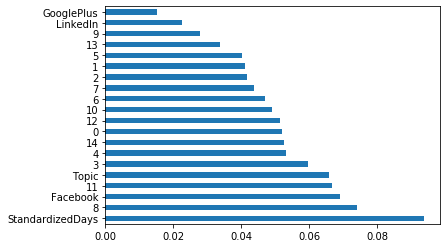

In [644]:
Freatures=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,'Facebook','LinkedIn','GooglePlus','StandardizedDays','Topic']
Target_Title=['SentimentTitle']

X=data[Freatures]
Y=data[Target_Title]


fre = RandomForestRegressor(max_depth=8,n_estimators=10,n_jobs=2)
fre.fit(X,Y.values.ravel())
print(fre.feature_importances_) 
feat_importances = pd.Series(fre.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[0.04286061 0.04480169 0.04313487 0.0538538  0.04869789 0.05131294
 0.05066927 0.04072419 0.06265199 0.04173505 0.05599813 0.04277385
 0.04417887 0.04239581 0.04653897 0.05611814 0.0231511  0.02897303
 0.0609012  0.11852861]


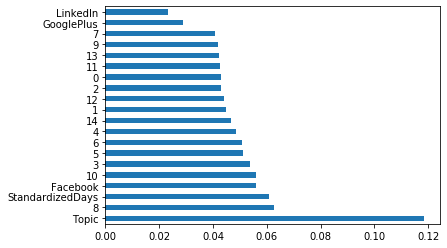

In [645]:
Freatures=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,'Facebook','LinkedIn','GooglePlus','StandardizedDays','Topic']
Target_Headline=['SentimentHeadline']

X=data[Freatures]
Y=data[Target_Headline]


fre = RandomForestRegressor(max_depth=8,n_estimators=100,n_jobs=2)
fre.fit(X,Y.values.ravel())
print(fre.feature_importances_) 
feat_importances = pd.Series(fre.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#PREDICTION FOR TITLES

In [648]:
Freatures_Title=[12,6,13,0,11,14,4,'Facebook','LinkedIn','GooglePlus','StandardizedDays','Topic']

In [649]:
from sklearn.model_selection import train_test_split
#X=data_only_df.drop(['SentimentTitle','SentimentHeadline','IDLink'],axis=1)
X=data[Freatures_Title]
Y=data[Target_Title]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=0 )

'''parameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.8, 0.9, 1.0],
    "n_estimators":[100,500,200]
    }'''

#reg = GradientBoostingRegressor(learning_rate= 0.1,max_depth=8,subsample=1.0,n_estimators=400)
#reg=DecisionTreeRegressor(max_depth=15)
#reg=KNeighborsRegressor(n_neighbors=4)
reg = RandomForestRegressor(max_depth=8,n_estimators=200,n_jobs=2)
#reg = ElasticNet()
#reg=SGDRegressor(max_iter=1000, tol=1e-3)
#reg = AdaBoostRegressor(learning_rate= 0.1,n_estimators=400)
reg.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [650]:
y_pred=reg.predict(X_test)
print('MAE:-->',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:-->',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:-->',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:-->',metrics.r2_score(y_test, y_pred))

MAE:--> 0.10032608367050269
MSE:--> 0.019224591661327676
RMSE:--> 0.13865277372388796
R2:--> 0.01130817336183254


In [651]:
#training error
train_pred=reg.predict(X_train)
print('MAE:-->',metrics.mean_absolute_error(y_train, train_pred))
print('MSE:-->',metrics.mean_squared_error(y_train, train_pred))
print('RMSE:-->',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R2:-->',metrics.r2_score(y_train, train_pred))

MAE:--> 0.09631093886232572
MSE:--> 0.017853599032975672
RMSE:--> 0.13361736052240994
R2:--> 0.05744785900287941


In [177]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X, Y.values.ravel(), cv=5,scoring='r2')

In [178]:
np.std(scores)

0.002871078971241775

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score

In [181]:
#LEARNING CURVES 
def plot_learning_curve(estimator, title, X, y, ylim=(-1.5,1), cv=5, scoring='r2',obj_line=None,n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):
    from sklearn.model_selection import learning_curve
    import numpy as np
    from matplotlib import pyplot as plt
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    
    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Adarsh\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

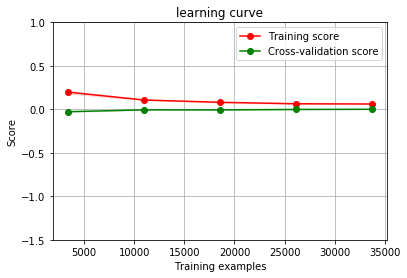

In [182]:
plot_learning_curve(reg,'learning curve',X,Y)

#PREDICTION FOR HEADLINES

In [535]:
Freatures_Headline=[7,1,3,4,6,8,5,'Facebook','LinkedIn','GooglePlus','StandardizedDays','Topic']
Target_Headline=['SentimentHeadline']

In [536]:
from sklearn.model_selection import train_test_split
#X=data_only_df.drop(['SentimentTitle','SentimentHeadline','IDLink'],axis=1)
X=data[Freatures_Headline]
Y=data[Target_Headline]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=0 )
#reg_Head = GradientBoostingRegressor(learning_rate= 0.1,max_depth=8,subsample=1.0,n_estimators=400)
reg_Head = RandomForestRegressor(max_depth=8,n_estimators=200,n_jobs=2)
#reg_Head = AdaBoostRegressor(learning_rate= 0.1,n_estimators=400)
reg_Head.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [537]:
y_pred=reg.predict(X_test)
print('MAE:-->',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:-->',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:-->',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:-->',metrics.r2_score(y_test, y_pred))

MAE:--> 0.11791606491717141
MSE:--> 0.02357127483713821
RMSE:--> 0.15352939404927712
R2:--> -0.12135117286316888


In [538]:
#training error
train_pred=reg_Head.predict(X_train)
print('MAE:-->',metrics.mean_absolute_error(y_train, train_pred))
print('MSE:-->',metrics.mean_squared_error(y_train, train_pred))
print('RMSE:-->',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R2:-->',metrics.r2_score(y_train, train_pred))

MAE:--> 0.07331493327208743
MSE:--> 0.009202177627979211
RMSE:--> 0.09592798146515547
R2:--> 0.5481602784124381


In [187]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg_Head, X, Y.values.ravel(), cv=5,scoring='r2')

In [192]:
np.mean(scores)

0.005598122318196031

<module 'matplotlib.pyplot' from 'C:\\Users\\Adarsh\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

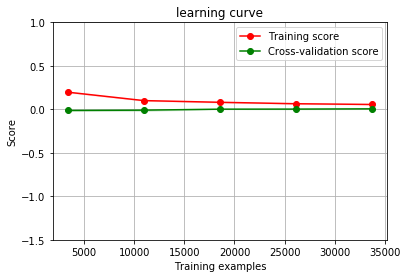

In [189]:
plot_learning_curve(reg_Head,'learning curve',X,Y)

In [539]:
test=pd.read_csv('test_file.csv')

In [540]:
test.head()
test.shape

(37288, 9)

In [541]:
# list ofString in Title
titles_list = [title for title in test['Title']]

# Collapse the list of strings into a single long string for processing
big_title_string = ' '.join(titles_list)

from nltk.tokenize import word_tokenize

# converting string into words
tokens = word_tokenize(big_title_string)

# Remove non-alphabetic tokens, such as punctuation
words = [word.lower() for word in tokens if word.isalpha()]

# Filter out stopwords, exampe At, for, in , is for getting relevant words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

words = [word for word in words if not word in stop_words]

# Print first 10 words
words[:10]

['sliding',
 'economy',
 'fg',
 'fights',
 'back',
 'tsa',
 'funds',
 'microsoft',
 'shows',
 'hololens']

In [542]:
len(titles_list)

37288

In [543]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in words if word in model.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a dataframe
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.shape

(15199, 300)

In [544]:
len(word_vec_dict)

15199

In [545]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])

In [546]:
tsne_df.shape

(400, 2)

In [547]:
# Preprocess the corpus
corpus = [preprocess(title) for title in titles_list]

# Remove docs that don't include any words in W2V's vocab
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: has_vector_representation(model, doc))

# Filter out any empty docs
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: (len(doc) != 0))

10 docs removed
0 docs removed


In [548]:
# Initialize an array for the size of the corpus
x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(model, doc))
    
X = np.array(x) # list to array

In [549]:
len(titles_list)

37278

In [550]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(X[:400])

In [551]:
test.shape

(37288, 9)

In [552]:
import datetime

# Convert publish date column to make it compatible with other datetime objects

test['PublishDate'] = pd.to_datetime(test['PublishDate'])

# Time since Linux Epoch
t = datetime.datetime(1970, 1, 1)

# Subtract this time from each article's publish date
test['TimeSinceEpoch'] = test['PublishDate'] - t

# Create another column for just the days from the timedelta objects 
test['DaysSinceEpoch'] = test['TimeSinceEpoch'].astype('timedelta64[D]')

test['TimeSinceEpoch'].describe()

count                         37288
mean     16938 days 07:42:49.347269
std         29 days 05:45:24.988225
min             16889 days 01:41:12
25%      16912 days 13:20:51.750000
50%             16937 days 23:52:52
75%      16964 days 05:26:18.750000
max             16989 days 16:16:11
Name: TimeSinceEpoch, dtype: object

In [553]:
pca = PCA(n_components=15, random_state=10) 
# as a reminder, x is the array with our 300-dimensional vectors
reduced_vecs = pca.fit_transform(x) 
df_w_vectors = pd.DataFrame(reduced_vecs) 
df_w_vectors [ 'Title'] = titles_list 
# Use pd.concat to match original titles with their vectors
main_w_vectors = pd.concat ((df_w_vectors, test), axis = 1)
# Get rid of vectors that could not be matched with the main_df
#main_w_vectors .dropna(axis=0, inplace=True)

In [554]:
main_w_vectors.shape

(37288, 27)

In [555]:
cols_to_drop = ['Title', 'TimeSinceEpoch', 'Headline', 'PublishDate', 'Source'] 
le = LabelEncoder()
data_only_df=pd.DataFrame()
data_only_df = main_w_vectors.drop(columns = cols_to_drop) 
data_only_df['Topic'] = le.fit_transform(main_w_vectors['Topic'].astype(str)) 
# Standardize DaysSinceEpoch since the raw numbers are larger in magnitude
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler () 
# Reshape so we can feed the column to the scaler 
Standardized_days = np.array(data_only_df['DaysSinceEpoch']).reshape(-1, 1) 
data_only_df['StandardizedDays']=0.0
data_only_df['StandardizedDays'] = scaler.fit_transform(Standardized_days) 
# Drop the raw column; we don't need it anymore 
data_only_df.drop (columns=['DaysSinceEpoch'], inplace=True)
# Look at the new range 
data_only_df['StandardizedDays'].describe()

C:\Users\Adarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Adarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Adarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

count    3.728800e+04
mean    -1.612251e-14
std      1.000013e+00
min     -1.668814e+00
25%     -8.823607e-01
50%     -2.751961e-02
75%      8.957088e-01
max      1.750550e+00
Name: StandardizedDays, dtype: float64

In [556]:
for i in data_only_df.columns:
    if data_only_df[i].isnull().sum()>1:
        data_only_df[i].fillna(data_only_df[i].median(), inplace=True)

C:\Users\Adarsh\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [557]:
data_only_df.isnull().sum()

0                   0
1                   0
2                   0
3                   0
4                   0
5                   0
6                   0
7                   0
8                   0
9                   0
10                  0
11                  0
12                  0
13                  0
14                  0
IDLink              0
Topic               0
Facebook            0
GooglePlus          0
LinkedIn            0
StandardizedDays    0
dtype: int64

In [558]:
title=data_only_df[Freatures_Title]
headline=data_only_df[Freatures_Headline]
submission=pd.DataFrame()

In [559]:
y_predtitle=reg.predict(title)
y_predheadline=reg_Head.predict(headline)

In [560]:
submission['IDLink']=data_only_df['IDLink']

In [561]:
submission.shape

(37288, 1)

In [562]:
submission['SentimentTitle']=y_predtitle
submission['SentimentHeadline']=y_predheadline

In [563]:
submission.shape

(37288, 3)

In [564]:
submission.head()

,IDLink,SentimentTitle,SentimentHeadline
0,tFrqIR6Chj,0.022379,-0.042269
1,DVAaGErjlF,-0.024393,-0.005202
2,OT9UIZm5M2,-0.056579,-0.137164
3,lflGp3q2Fj,-0.032092,-0.051259
4,zDYG0SoovZ,-0.008465,-0.047002


In [565]:
submission.to_csv('submission_file.csv')